In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# NLP
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence
from gensim.models import Word2Vec

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential
from keras.utils import plot_model
# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Embedding
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply
# Deep Learning Model - Keras - LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D
# Visualization


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
books_neg = pd.read_csv("/content/drive/My Drive/LSTM/books_negative.csv")
books_pos = pd.read_csv("/content/drive/My Drive/LSTM/books_positive.csv")
dvd_neg = pd.read_csv("/content/drive/My Drive/LSTM/dvd_negative.csv")
dvd_pos = pd.read_csv("/content/drive/My Drive/LSTM/dvd_positive.csv")
ele_neg = pd.read_csv("/content/drive/My Drive/LSTM/electronics_negative.csv")
ele_pos = pd.read_csv("/content/drive/My Drive/LSTM/electronics_positive.csv")
kit_neg = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_negative.csv")
kit_pos = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_positive.csv")


In [7]:
books_neg['label'] = 0 
books_pos['label'] = 1
books = pd.concat([books_neg,books_pos],axis = 0)
books['domain'] = 'books'
dvd_neg['label'] = 0
dvd_pos['label'] = 1
dvd = pd.concat([dvd_pos, dvd_neg],axis = 0)
dvd['domain'] = 'dvd'
ele_neg['label'] = 0
ele_pos['label'] = 1
ele = pd.concat([ele_neg, ele_pos],axis = 0)
ele['domain'] = 'electronics'
kit_neg['label'] = 0
kit_pos['label'] = 1
kit = pd.concat([kit_neg, kit_pos],axis = 0)
kit['domain'] = 'kitchen'
alldata = pd.concat([books,dvd,ele,kit])

In [8]:
books =books.reset_index(drop=True)
dvd =dvd.reset_index(drop=True)
ele =ele.reset_index(drop=True)
kit =kit.reset_index(drop=True)

In [9]:
x_books = books['review_text']
y_books = books['label']

x_dvd = dvd['review_text']
y_dvd = dvd['label']

x_ele = ele['review_text']
y_ele = ele['label']

x_kit = kit['review_text']
y_kit = kit['label']

In [10]:
def clean_doc(doc):
    #split into words
    tokens = word_tokenize(doc)
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #prepare regex for char filtering
    re_punc =re.compile('[%s]'% re.escape(string.punctuation))
    #remove punctuation
    stripped =[re_punc.sub('',w) for w in tokens]
    #filter out stop words
    #stop_words = set(stopwords.words('english'))
    #words =[w for w in words if not w in stop_words]
    #remove remaining tokens that are not alphabetic
    words = [w for w in stripped if w.isalpha()]
    #filter out short tokens
    tokens = [word for word in words if len(word)>1]
    return tokens

In [11]:
text_books = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_books.append(trainx)

In [12]:
text_dvd = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_dvd.append(trainx)

In [13]:
text_ele = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_ele.append(trainx)

In [14]:
text_kit = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_kit.append(trainx)

In [15]:
label_encoder = LabelEncoder()

Y_books = label_encoder.fit_transform(y_books)
Y_books = to_categorical(Y_books)
Y_books.shape

Y_dvd = label_encoder.fit_transform(y_dvd)
Y_dvd = to_categorical(Y_dvd)
Y_dvd.shape


Y_ele = label_encoder.fit_transform(y_ele)
Y_ele = to_categorical(Y_ele)
Y_ele.shape


Y_kit = label_encoder.fit_transform(y_kit)
Y_kit = to_categorical(Y_kit)
Y_kit.shape

(2000, 2)

In [16]:
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(text_books, Y_books, test_size=0.15)

X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(text_dvd, Y_dvd, test_size=0.15)

X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(text_ele, Y_ele, test_size=0.15)

X_train_k, X_test_k, Y_train_k, Y_test_k = train_test_split(text_kit, Y_kit, test_size=0.15)




In [17]:
max_words_b = len(set(" ".join(text_books).split()))
max_len_b = max([len(s.split()) for s in text_books])
max_words_b, max_len_b

(26109, 3227)

In [18]:
max_words_d = len(set(" ".join(text_dvd).split()))
max_len_d = max([len(s.split()) for s in text_dvd])
max_words_d, max_len_d

(25855, 1415)

In [19]:
max_words_e = len(set(" ".join(text_ele).split()))
max_len_e = max([len(s.split()) for s in text_ele])
max_words_e, max_len_e

(13491, 918)

In [20]:
max_words_k = len(set(" ".join(text_kit).split()))
max_len_k = max([len(s.split()) for s in text_kit])
max_words_k, max_len_k

(11675, 958)

In [21]:
max_words = max(max_words_b,max_words_d,max_words_e,max_words_k)
#max_len = max(max_len_b,max_len_d,max_len_e,max_len_k)
max_len = 120

In [22]:
tokenizer_b = Tokenizer(num_words=max_words)

tokenizer_b.fit_on_texts(X_train_b)

X_train_b_seq = tokenizer_b.texts_to_sequences(X_train_b)
X_train_b_seq = sequence.pad_sequences(X_train_b_seq, maxlen=max_len)


tokenizer_b.fit_on_texts(X_test_b)

X_test_b_seq = tokenizer_b.texts_to_sequences(X_test_b)
X_test_b_seq = sequence.pad_sequences(X_test_b_seq, maxlen=max_len)

tokenizer_d = Tokenizer(num_words=max_words)

tokenizer_d.fit_on_texts(X_train_d)

X_train_d_seq = tokenizer_d.texts_to_sequences(X_train_d)
X_train_d_seq = sequence.pad_sequences(X_train_d_seq, maxlen=max_len)

tokenizer_d.fit_on_texts(X_test_d)

X_test_d_seq = tokenizer_d.texts_to_sequences(X_test_d)
X_test_d_seq = sequence.pad_sequences(X_test_d_seq, maxlen=max_len)

tokenizer_e = Tokenizer(num_words=max_words)

tokenizer_e.fit_on_texts(X_train_e)

X_train_e_seq = tokenizer_e.texts_to_sequences(X_train_e)
X_train_e_seq = sequence.pad_sequences(X_train_e_seq, maxlen=max_len)

tokenizer_e.fit_on_texts(X_test_e)

X_test_e_seq = tokenizer_e.texts_to_sequences(X_test_e)
X_test_e_seq = sequence.pad_sequences(X_test_e_seq, maxlen=max_len)

tokenizer_k = Tokenizer(num_words=max_words)

tokenizer_k.fit_on_texts(X_train_k)

X_train_k_seq = tokenizer_k.texts_to_sequences(X_train_k)
X_train_k_seq = sequence.pad_sequences(X_train_k_seq, maxlen=max_len)
tokenizer_k.fit_on_texts(X_test_k)

X_test_k_seq = tokenizer_k.texts_to_sequences(X_test_k)
X_test_k_seq = sequence.pad_sequences(X_test_k_seq, maxlen=max_len)

In [23]:
def get_cnn_model(num_class=2):   
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    
    model.add(Conv1D(1024, 2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    model.add(Dense(num_class, activation='sigmoid'))
    model.summary()
    return model

In [24]:
def plot_performance(history=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    plt.show()

In [25]:
loss = 'binary_crossentropy'
metrics = ['accuracy']
learning_rate = 0.01
optimizer = Adam(learning_rate)
num_class = 2
model1 = get_cnn_model(num_class=num_class)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 100)          2610900   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 119, 1024)         205824    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 2,818,774
Trainable params: 2,818,774
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit network
model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history1 = model1.fit(X_train_b_seq, Y_train_b, validation_data=(X_test_b_seq, Y_test_b),batch_size=128,epochs=100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 9s 5ms/step - loss: 0.6504 - accuracy: 0.5997 - val_loss: 0.7431 - val_accuracy: 0.5467
Epoch 2/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.3427 - accuracy: 0.8547 - val_loss: 1.3446 - val_accuracy: 0.5200
Epoch 3/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0690 - accuracy: 0.9753 - val_loss: 1.6105 - val_accuracy: 0.5167
Epoch 4/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 2.0115 - val_accuracy: 0.4883
Epoch 5/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 2.3564 - val_accuracy: 0.5033
Epoch 6/100
1700/1700 [==============================] - 8s 5ms/step - loss: 2.6410e-04 - accuracy: 1.0000 - val_loss: 2.2204 - val_accuracy: 0.4900
Epoch 7/100
1700/1700 [==============================] - 8s 5ms/step - loss: 9.

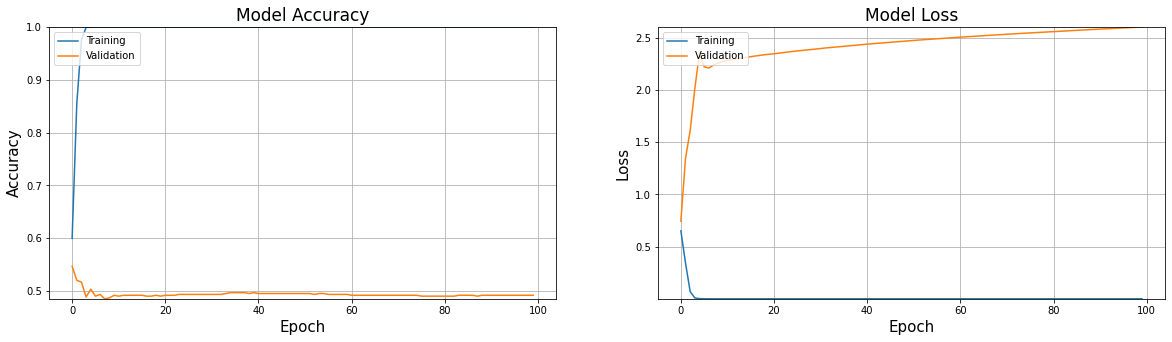

In [27]:
plot_performance(history=history1)

In [28]:
history2 = model1.fit(X_train_d_seq, Y_train_d, validation_data=(X_test_d_seq, Y_test_d),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 8s 5ms/step - loss: 3.0976 - accuracy: 0.5282 - val_loss: 1.2662 - val_accuracy: 0.5000
Epoch 2/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.8505 - accuracy: 0.7724 - val_loss: 1.7676 - val_accuracy: 0.5133
Epoch 3/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0868 - accuracy: 0.9735 - val_loss: 3.1437 - val_accuracy: 0.5333
Epoch 4/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0197 - accuracy: 0.9947 - val_loss: 3.4752 - val_accuracy: 0.5300
Epoch 5/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 4.3897 - val_accuracy: 0.5283
Epoch 6/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 4.6721 - val_accuracy: 0.5300
Epoch 7/100
1700/1700 [==============================] - 8s 5ms/step - loss: 9.9001

In [29]:
history3 = model1.fit(X_train_e_seq, Y_train_e, validation_data=(X_test_e_seq, Y_test_e),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 8s 5ms/step - loss: 2.7998 - accuracy: 0.5494 - val_loss: 1.5531 - val_accuracy: 0.5000
Epoch 2/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.5410 - accuracy: 0.8203 - val_loss: 2.2921 - val_accuracy: 0.5083
Epoch 3/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.1193 - accuracy: 0.9597 - val_loss: 2.6739 - val_accuracy: 0.5100
Epoch 4/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0669 - accuracy: 0.9821 - val_loss: 2.8053 - val_accuracy: 0.4867
Epoch 5/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0386 - accuracy: 0.9909 - val_loss: 4.6271 - val_accuracy: 0.5050
Epoch 6/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0204 - accuracy: 0.9947 - val_loss: 3.9053 - val_accuracy: 0.5167
Epoch 7/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0235

In [30]:
history4 = model1.fit(X_train_k_seq, Y_train_k, validation_data=(X_test_k_seq, Y_test_k),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 8s 5ms/step - loss: 3.4235 - accuracy: 0.5188 - val_loss: 7.1084 - val_accuracy: 0.4517
Epoch 2/100
1700/1700 [==============================] - 8s 5ms/step - loss: 1.5764 - accuracy: 0.7576 - val_loss: 4.2489 - val_accuracy: 0.4633
Epoch 3/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.4529 - accuracy: 0.9241 - val_loss: 3.7185 - val_accuracy: 0.5133
Epoch 4/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0824 - accuracy: 0.9759 - val_loss: 4.9711 - val_accuracy: 0.4900
Epoch 5/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 4.4428 - val_accuracy: 0.5200
Epoch 6/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 5.0512 - val_accuracy: 0.4983
Epoch 7/100
1700/1700 [==============================] - 8s 5ms/step - loss: 0.0054

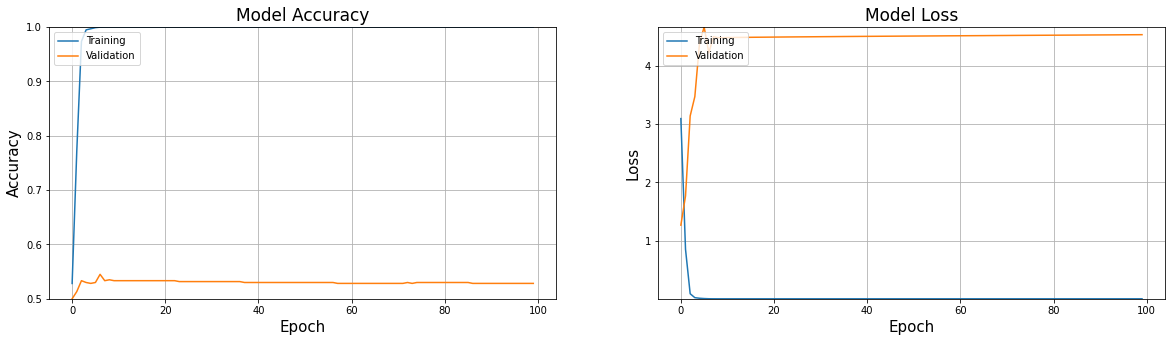

In [31]:
plot_performance(history=history2)

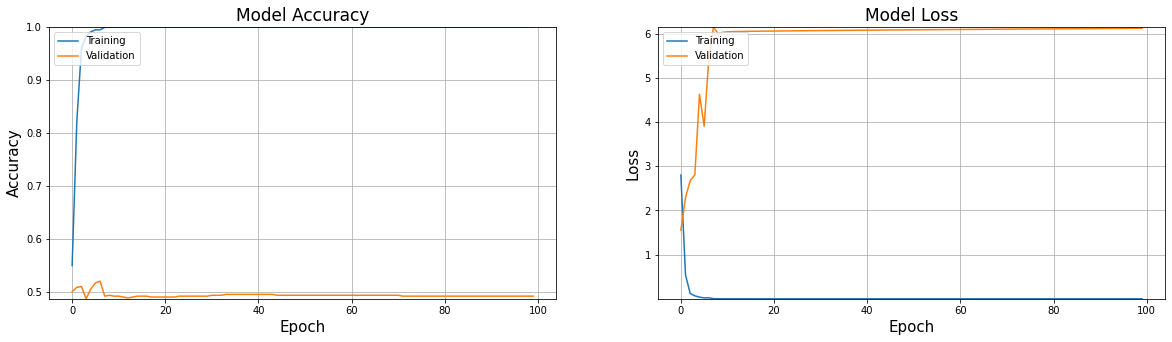

In [32]:
plot_performance(history=history3)

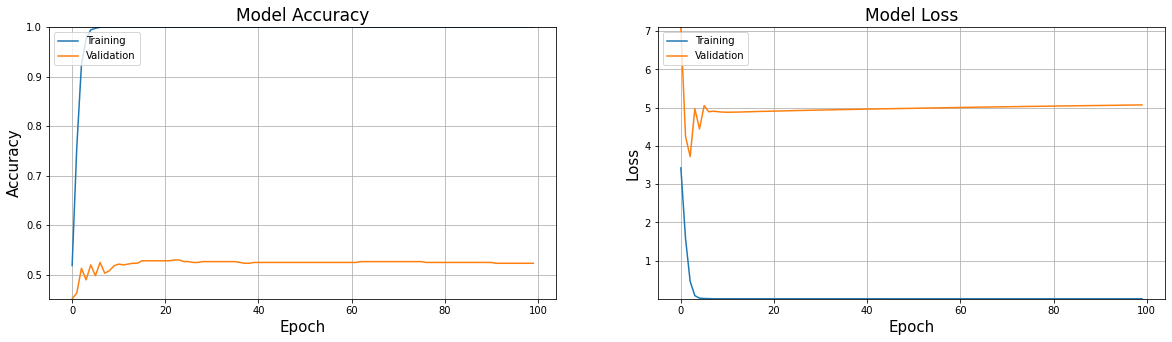

In [33]:
plot_performance(history=history4)